In [1]:
import pandas as pd
import osmnx as ox
import matplotlib.pyplot as plt
%matplotlib inline

d:\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
json_file = open("../data/porto_boundary.geojson")
train_data = pd.read_csv('../data/train-1000.csv')
graphml_file = '../data/porto.graphml'

In [3]:
network_graph = ox.io.load_graphml(graphml_file)

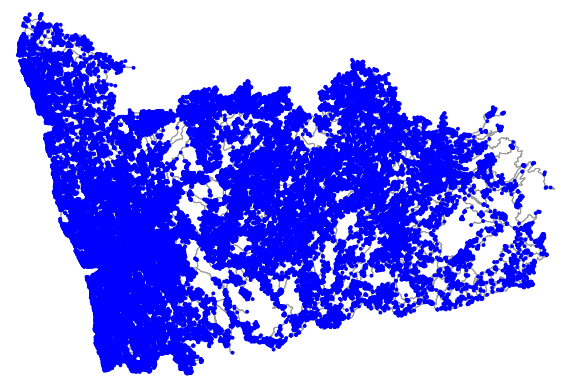

(<Figure size 720x720 with 1 Axes>, <AxesSubplot:>)

In [4]:
ox.plot_graph(network_graph, figsize=(10, 10), bgcolor='#ffffff', node_color='b')

In [5]:
def vis_single_GPS_point(trip_number, color, network_graph, savepath=None, if_line=False, show=True):

    fig, ax = ox.plot_graph(network_graph, node_size=3, figsize=(20, 20), bgcolor='#000000', edge_linewidth=1.5, show=False)

    gps_points = eval(train_data['POLYLINE'][trip_number])
    x, y = zip(*gps_points)

    # resize the map
    x_gap, y_gap = (max(x) - min(x))/2, (max(y) - min(y))/2
    x_mid, y_mid = (max(x) + min(x))/2, (max(y) + min(y))/2
    ax.set_xlim(x_mid - x_gap*1.2, x_mid + x_gap*1.2)
    ax.set_ylim(y_mid - y_gap*1.2, y_mid + y_gap*1.2)

    if if_line:
        ax.plot(x, y, linewidth = 4, color=color, linestyle='-', marker='o', markersize=50)
    else:
        ax.scatter(x, y, c=color, marker='o',s=50)

    if savepath:
        fig.savefig(savepath)
        print(f'GPS{trip_number+1} picture is completed.')

    if show:
        plt.show()

In [6]:
GPS_point_list = enumerate(('blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'), start=0)

GPS1 picture is completed.


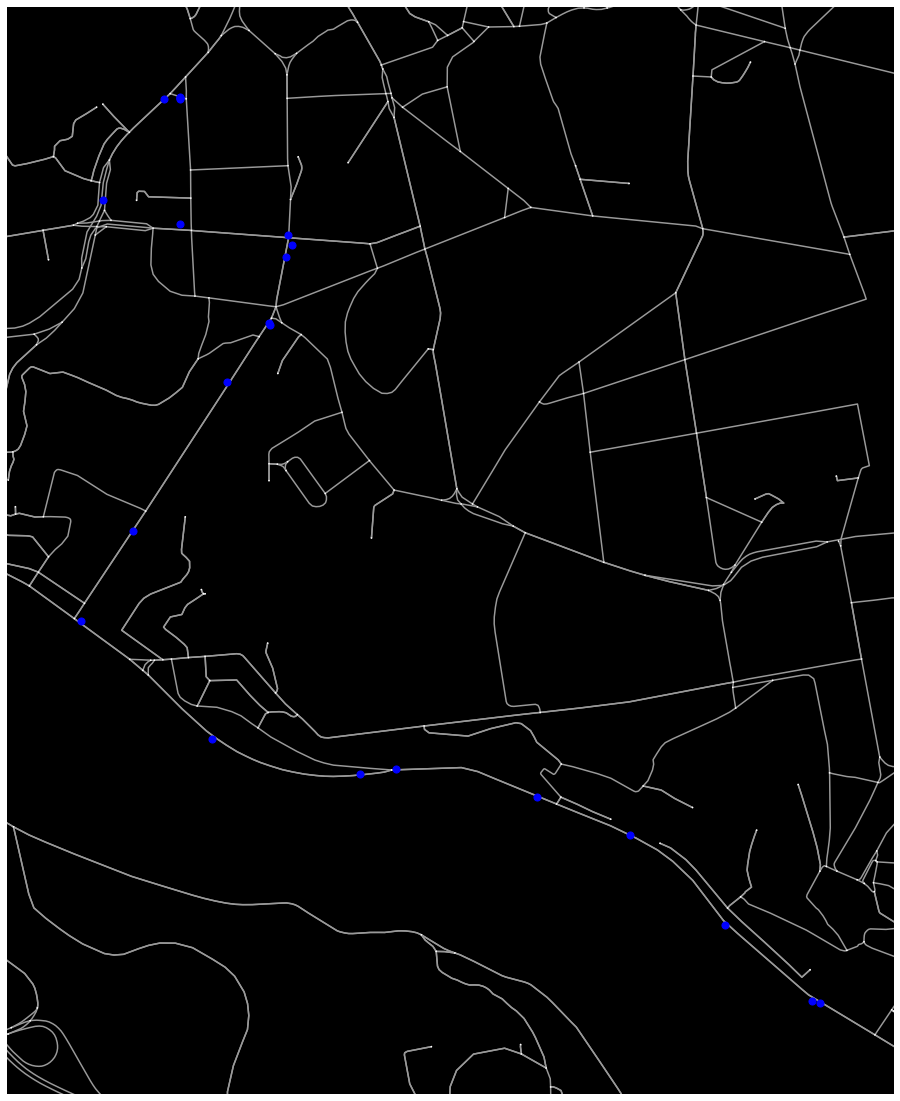

GPS2 picture is completed.


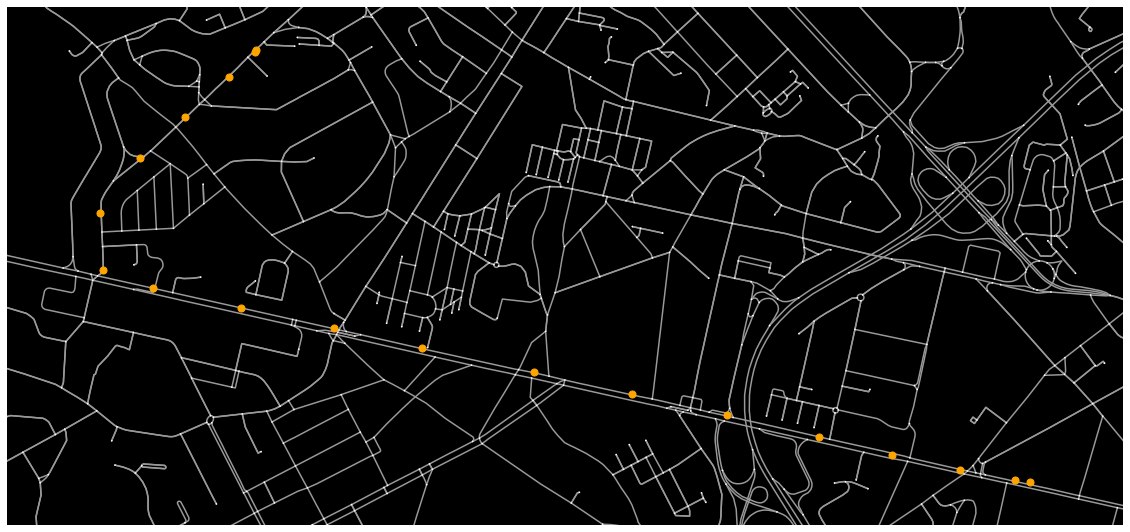

GPS3 picture is completed.


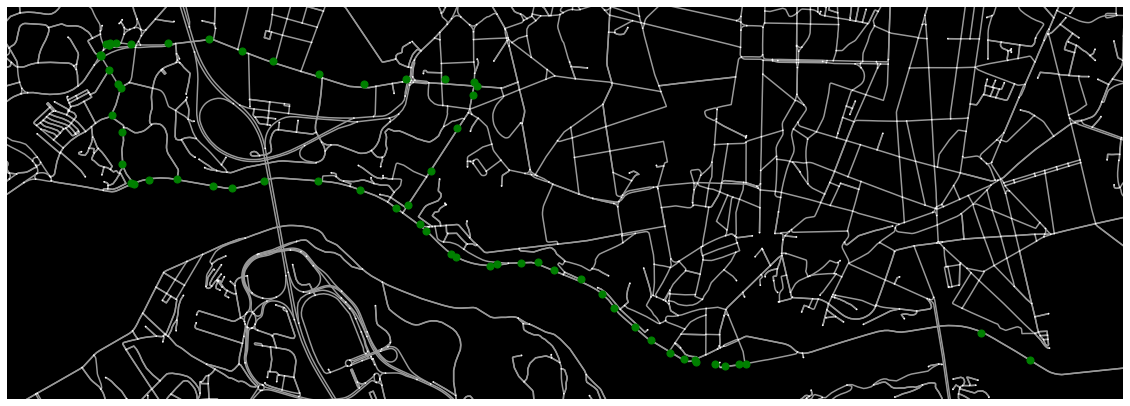

GPS4 picture is completed.


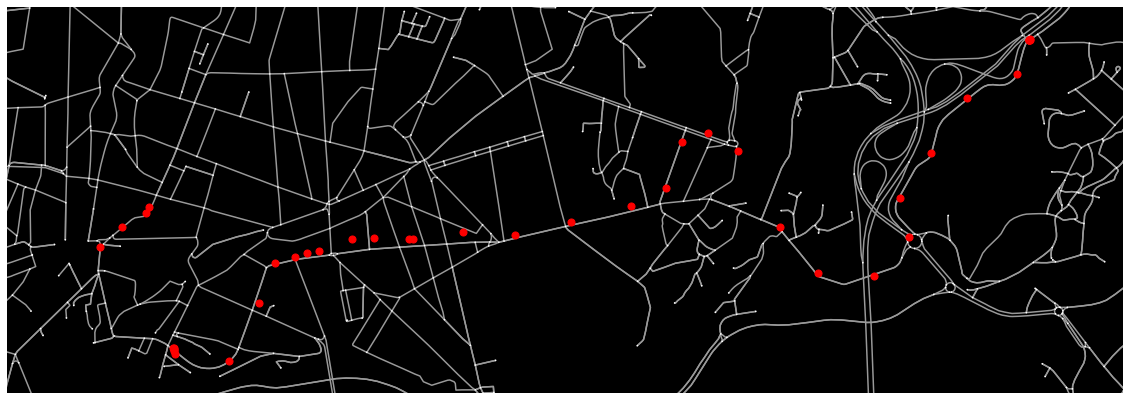

GPS5 picture is completed.


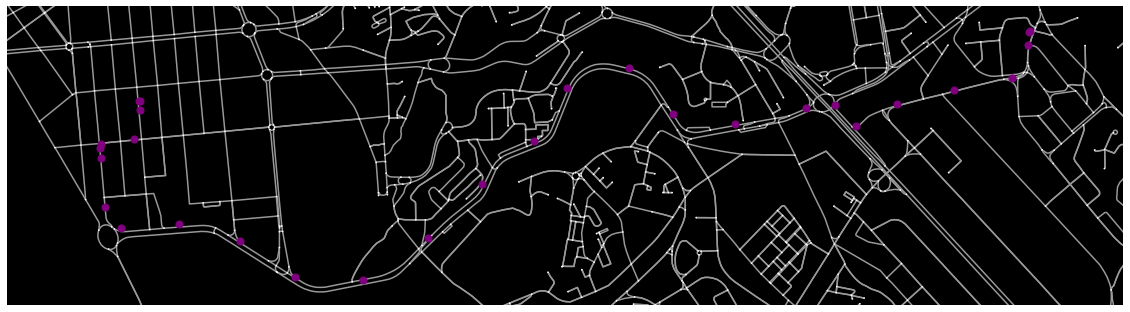

GPS6 picture is completed.


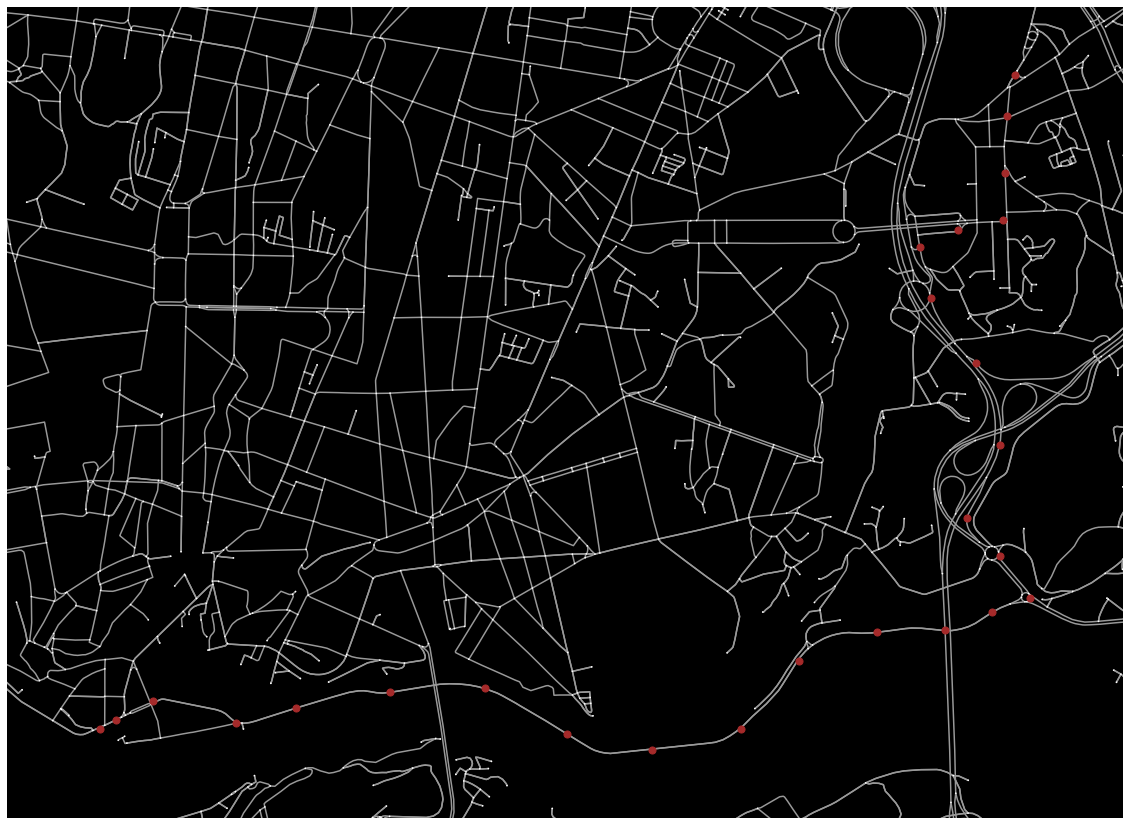

GPS7 picture is completed.


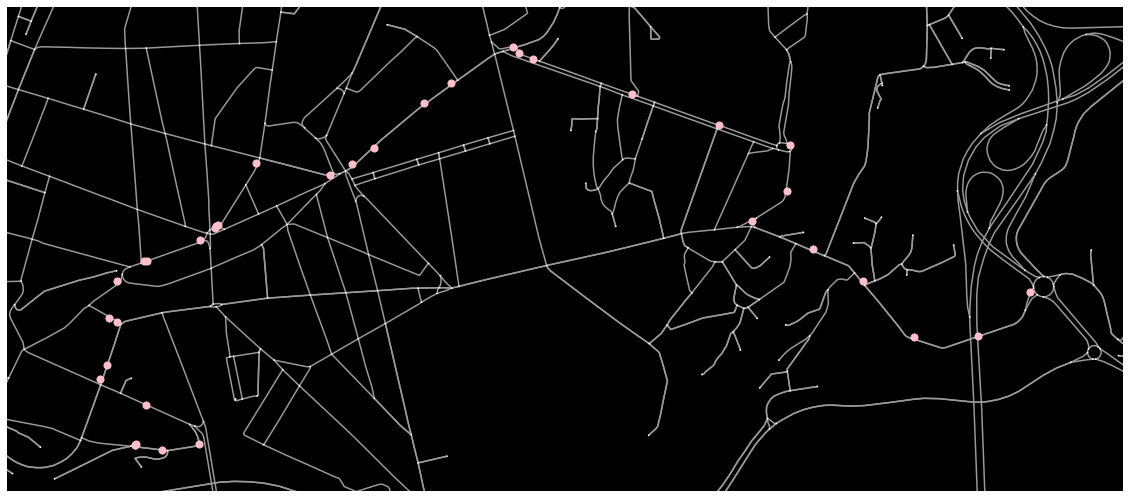

GPS8 picture is completed.


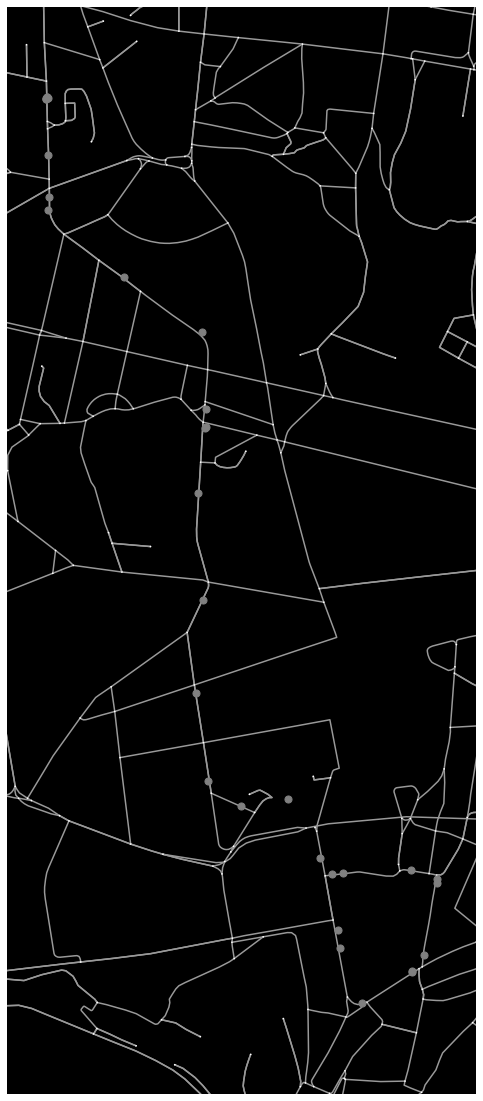

GPS9 picture is completed.


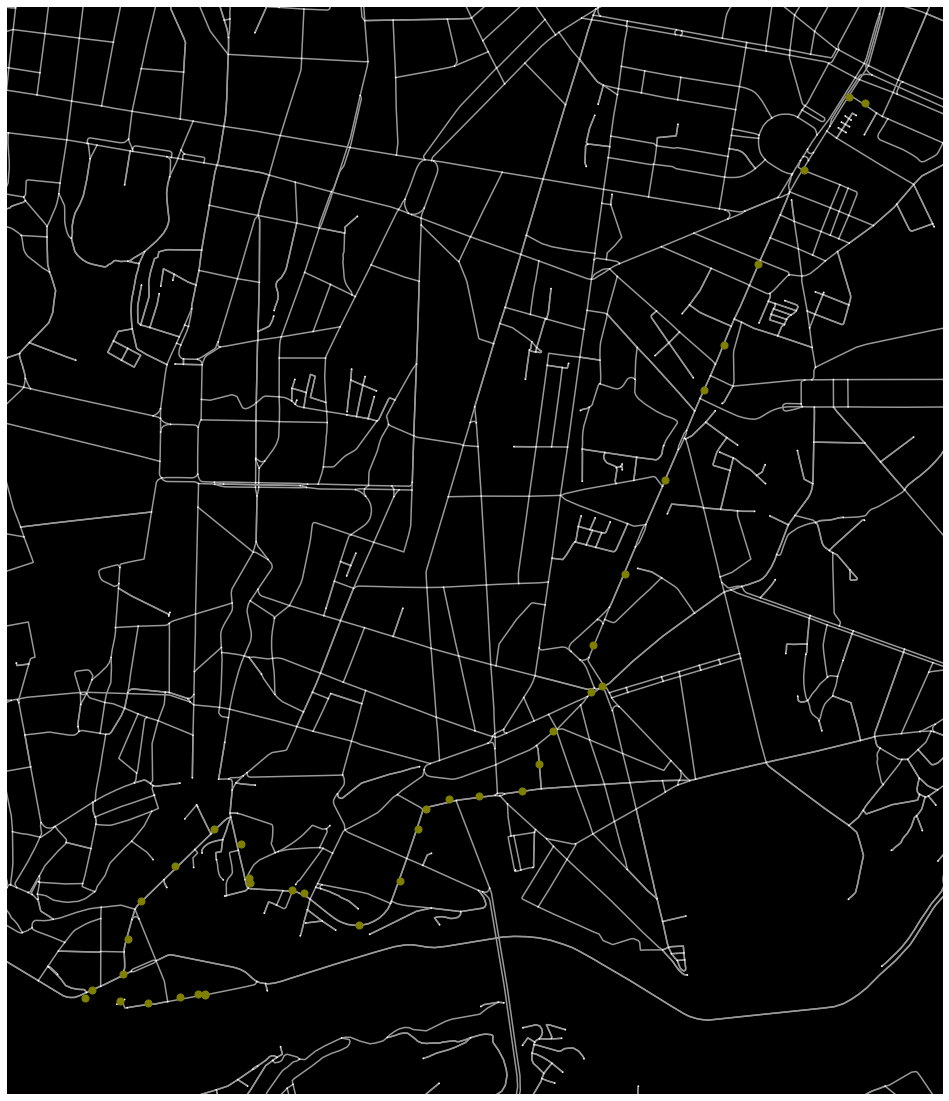

GPS10 picture is completed.


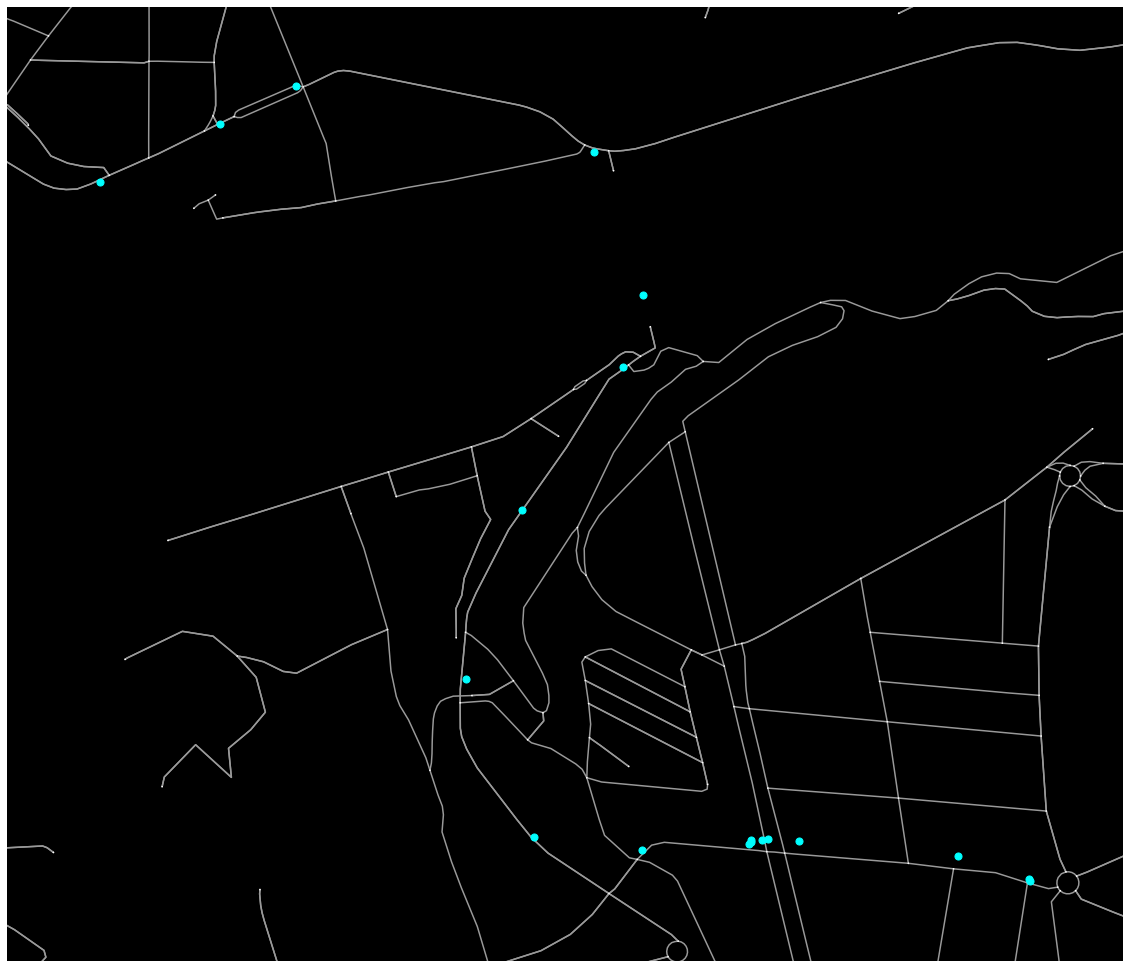

In [16]:
for trip_number, color in GPS_point_list:
    vis_single_GPS_point(trip_number, color=color, network_graph=network_graph, savepath=f'../result/task2/GPS{trip_number+1}.png', if_line=False)

In [40]:
def vis_ten_GPS_points(network_graph, savepath=None, if_line=False, show=True):

    fig, ax = ox.plot_graph(network_graph, node_size=3, figsize=(20, 20), bgcolor='#000000', edge_linewidth=1.5, show=False)
    GPS_point_list = enumerate(('blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'), start=0)
    
    # get the maximum and minimun of x and y
    x_min, x_max = 0, -10
    y_min, y_max = 100, 0

    for trip_number, color in GPS_point_list:
        print(f'Processing GPS{trip_number+1}...')
        gps_points = eval(train_data['POLYLINE'][trip_number])
        x, y = zip(*gps_points)

        x_min = min(min(x), x_min)
        x_max = max(max(x), x_max)
        y_min = min(min(y), y_min)
        y_max = max(max(y), y_max)

        if if_line:
            ax.plot(x, y, linewidth = 4, color=color, linestyle='-', marker='o', markersize=50)
        else:
            ax.scatter(x, y, c=color, marker='o',s=50)

    # resize the map
    x_gap, y_gap = (x_max - x_min)/2, (y_max - y_min)/2
    x_mid, y_mid = (x_max + x_min)/2, (y_max + y_min)/2
    ax.set_xlim(x_mid - x_gap*1.2, x_mid + x_gap*1.2)
    ax.set_ylim(y_mid - y_gap*1.2, y_mid + y_gap*1.2)
    
    if savepath:
        fig.savefig(savepath)
        print(f'The 10 GPS picture is completed.')

    if show:
        plt.show()

Processing GPS1...
Processing GPS2...
Processing GPS3...
Processing GPS4...
Processing GPS5...
Processing GPS6...
Processing GPS7...
Processing GPS8...
Processing GPS9...
Processing GPS10...
The 10 GPS picture is completed.


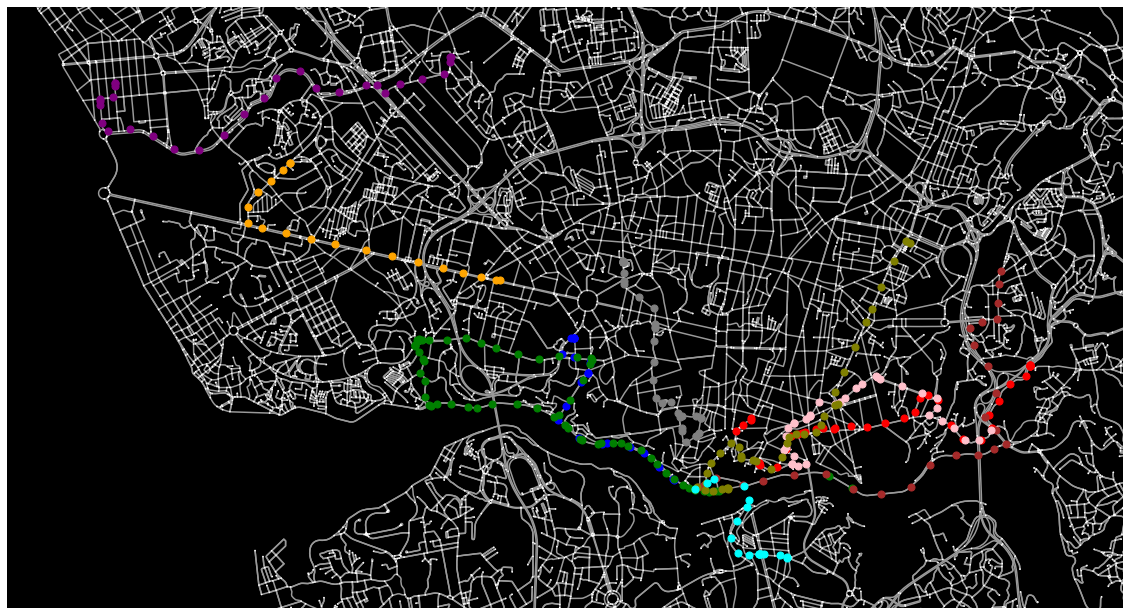

In [41]:
vis_ten_GPS_points(network_graph=network_graph, savepath='../result/task2/allGPS.png', if_line=False, show=True)